In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-countries-gdp-information/Top countries GDP info.csv


![](https://www.imf.org/-/media/Images/IMF/Blog/Migrated/BLOG-1024x600-Global-Economy-Globe-and-chart-scyther5-iStock-187915237.ashx)

# Data Understanding

In [3]:
df=pd.read_csv("/kaggle/input/top-countries-gdp-information/Top countries GDP info.csv")

In [4]:
df.head()

,Unnamed: 0,Year,GDP (in Bil. US$PPP),GDP per capita (in US$ PPP),GDP (in Bil. US$nominal),GDP per capita (in US$ nominal),GDP growth (real),Inflation rate (in Percent),Unemployment (in Percent),Government debt (in % of GDP),Country
0,0,1980,2857.3,12552.9,2857.3,12552.9,-0.3%,13.5%,7.2%,NaN,US
1,1,1981,3207.0,13948.7,3207.0,13948.7,2.5%,10.4%,7.6%,NaN,US
2,2,1982,3343.8,14405.0,3343.8,14405.0,-1.8%,6.2%,9.7%,NaN,US
3,3,1983,3634.0,15513.7,3634.0,15513.7,4.6%,3.2%,9.6%,NaN,US
4,4,1984,4037.7,17086.4,4037.7,17086.4,7.2%,4.4%,7.5%,NaN,US


In [5]:
df = df.drop("Unnamed: 0", axis=1)

In [6]:
df.head()

,Year,GDP (in Bil. US$PPP),GDP per capita (in US$ PPP),GDP (in Bil. US$nominal),GDP per capita (in US$ nominal),GDP growth (real),Inflation rate (in Percent),Unemployment (in Percent),Government debt (in % of GDP),Country
0,1980,2857.3,12552.9,2857.3,12552.9,-0.3%,13.5%,7.2%,NaN,US
1,1981,3207.0,13948.7,3207.0,13948.7,2.5%,10.4%,7.6%,NaN,US
2,1982,3343.8,14405.0,3343.8,14405.0,-1.8%,6.2%,9.7%,NaN,US
3,1983,3634.0,15513.7,3634.0,15513.7,4.6%,3.2%,9.6%,NaN,US
4,1984,4037.7,17086.4,4037.7,17086.4,7.2%,4.4%,7.5%,NaN,US


### Dataset Description
- **Year:** The year of the data point.

- **GDP (in Bil. US$PPP):** Gross Domestic Product in billions of US dollars adjusted for purchasing power parity (PPP).

- **GDP per capita (in US$PPP):** Gross Domestic Product per capita in US dollars adjusted for purchasing power parity (PPP).

- **GDP (in Bil. US$nominal):** Gross Domestic Product in billions of US dollars at current prices.

- **GDP per capita (in US$ nominal):** Gross Domestic Product per capita in US dollars at current prices.
- **GDP growth (real):** The annual percentage change in Gross Domestic Product adjusted for inflation.
- **Inflation rate (in Percent):** The annual percentage change in the price level of goods and services in an economy.
- **Unemployment (in Percent):** The percentage of the labor force that is unemployed and seeking employment.
- **Government debt (in % of GDP):** The percentage of a country's Gross Domestic Product that is owed to creditors by the government.
- **Country:** The name of the country to which the data point belongs.

In [7]:
df.sample(20)

,Year,GDP (in Bil. US$PPP),GDP per capita (in US$ PPP),GDP (in Bil. US$nominal),GDP per capita (in US$ nominal),GDP growth (real),Inflation rate (in Percent),Unemployment (in Percent),Government debt (in % of GDP),Country
54,1986,718.6,668.4,300.9,279.9,8.6%,6.5%,2.0%,NaN,China
14,1994,7287.3,27674.0,7287.3,27674.0,4.0%,2.6%,6.1%,NaN,US
63,1995,2225.5,1837.4,731.0,603.5,11.0%,17.1%,2.9%,21.6%,China
181,2017,4411.7,53373.9,3689.5,44636.8,2.7%,1.7%,3.6%,64.6%,Germany
220,2008,4236.8,3528.7,1224.1,1019.5,3.9%,9.1%,5.4%,72.8%,India
221,2009,4625.5,3798.5,1365.4,1121.2,8.5%,12.3%,5.5%,71.5%,India
27,2007,14474.3,47943.4,14474.3,47943.4,2.0%,2.9%,4.6%,64.6%,US
118,2002,3625.5,28457.7,4182.8,32832.3,0.0%,-0.9%,5.4%,154.1%,Japan
74,2006,7601.3,5782.8,2754.1,2095.2,12.7%,1.5%,4.1%,25.6%,China
217,2005,3150.3,2745.1,834.2,726.9,9.3%,4.4%,5.6%,81.0%,India


In [8]:
df.shape

(240, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             240 non-null    int64  
 1   GDP (in Bil. US$PPP)             240 non-null    float64
 2   GDP per capita (in US$ PPP)      240 non-null    float64
 3   GDP (in Bil. US$nominal)         240 non-null    float64
 4   GDP per capita (in US$ nominal)  240 non-null    float64
 5   GDP growth (real)                240 non-null    object 
 6   Inflation rate (in Percent)      239 non-null    object 
 7   Unemployment (in Percent)        223 non-null    object 
 8   Government debt (in % of GDP)    182 non-null    object 
 9   Country                          240 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 18.9+ KB


In [10]:
df.columns

Index(['Year', 'GDP (in Bil. US$PPP)', 'GDP per capita (in US$ PPP)',
       'GDP (in Bil. US$nominal)', 'GDP per capita (in US$ nominal)',
       'GDP growth (real)', 'Inflation rate (in Percent)',
       'Unemployment (in Percent)', 'Government debt (in % of GDP)',
       'Country'],
      dtype='object')

# Data Preprocessing

In [11]:
# Replace % sign with empty string ''
df['GDP growth (real)'] = df['GDP growth (real)'].replace('%', '', regex=True)
df['Inflation rate (in Percent)'] = df['Inflation rate (in Percent)'].replace('%', '', regex=True)
df['Unemployment (in Percent)'] = df['Unemployment (in Percent)'].replace('%', '', regex=True)
# df['Government debt (in % of GDP)'] = df['Government debt (in % of GDP)'].replace('%', '', regex=True)



# Convert columns to float
df['GDP growth (real)'] = df['GDP growth (real)'].astype(float)
df['Inflation rate (in Percent)'] = df['Inflation rate (in Percent)'].astype(float)
df['Unemployment (in Percent)'] = df['Unemployment (in Percent)'].astype(float)
# df['Government debt (in % of GDP)'] = df['Government debt (in % of GDP)'].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             240 non-null    int64  
 1   GDP (in Bil. US$PPP)             240 non-null    float64
 2   GDP per capita (in US$ PPP)      240 non-null    float64
 3   GDP (in Bil. US$nominal)         240 non-null    float64
 4   GDP per capita (in US$ nominal)  240 non-null    float64
 5   GDP growth (real)                240 non-null    float64
 6   Inflation rate (in Percent)      239 non-null    float64
 7   Unemployment (in Percent)        223 non-null    float64
 8   Government debt (in % of GDP)    182 non-null    object 
 9   Country                          240 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 18.9+ KB


In [13]:
df["Government debt (in % of GDP)"] = df[df.columns[8]].str.replace('%', '').astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             240 non-null    int64  
 1   GDP (in Bil. US$PPP)             240 non-null    float64
 2   GDP per capita (in US$ PPP)      240 non-null    float64
 3   GDP (in Bil. US$nominal)         240 non-null    float64
 4   GDP per capita (in US$ nominal)  240 non-null    float64
 5   GDP growth (real)                240 non-null    float64
 6   Inflation rate (in Percent)      239 non-null    float64
 7   Unemployment (in Percent)        223 non-null    float64
 8   Government debt (in % of GDP)    182 non-null    object 
 9   Country                          240 non-null    object 
 10  Government debt (in % of GDP)    182 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 20.8+ KB


In [15]:
df = df.drop(df.columns[8], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             240 non-null    int64  
 1   GDP (in Bil. US$PPP)             240 non-null    float64
 2   GDP per capita (in US$ PPP)      240 non-null    float64
 3   GDP (in Bil. US$nominal)         240 non-null    float64
 4   GDP per capita (in US$ nominal)  240 non-null    float64
 5   GDP growth (real)                240 non-null    float64
 6   Inflation rate (in Percent)      239 non-null    float64
 7   Unemployment (in Percent)        223 non-null    float64
 8   Country                          240 non-null    object 
 9   Government debt (in % of GDP)    182 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 18.9+ KB


# Data Visualization

## Tasks:
1. How many times and in which years did each country experience a decline in GDP (in Bil. US$PPP) over the period under consideration?

2. How many times and in which years did each country experience a decline in GDP per capita (in US$ PPP) over the period under consideration?

3. How many times and in which years did each country experience a decline in GDP (in Bil. US$nominal) over the period under consideration?

4. How many times and in which years did each country experience a decline in GDP growth (real) over the period under consideration?

5. How many times and in which years did each country experience a decline in Inflation rate (in Percent) over the period under consideration?

6. How many times and in which years did each country experience a decline in Unemployment (in Percent) over the period under consideration?

7. How many times and in which years did each country experience a decline in Government debt (in % of GDP) over the period under consideration?



In [17]:
df.columns

Index(['Year', 'GDP (in Bil. US$PPP)', 'GDP per capita (in US$ PPP)',
       'GDP (in Bil. US$nominal)', 'GDP per capita (in US$ nominal)',
       'GDP growth (real)', 'Inflation rate (in Percent)',
       'Unemployment (in Percent)', 'Country',
       'Government debt (in % of GDP)'],
      dtype='object')

# 1. How many times and in which years did each country experience a decline in GDP (in Bil. US$PPP) over the period under consideration?

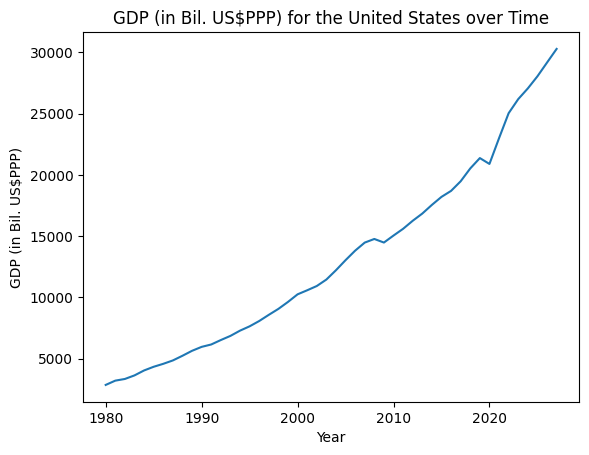

In [18]:
# import matplotlib
import matplotlib.pyplot as plt

# filter the data to include only rows where the 'Country' column is 'US'
us_df = df[df['Country'] == 'US']

# create a line plot with 'Year' on the x-axis and 'GDP (in Bil. US$PPP)' on the y-axis
plt.plot(us_df['Year'], us_df['GDP (in Bil. US$PPP)'])

# set the title and axis labels
plt.title('GDP (in Bil. US$PPP) for the United States over Time')
plt.xlabel('Year')
plt.ylabel('GDP (in Bil. US$PPP)')

# display the plot
plt.show()

/tmp/ipykernel_34/1522575763.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate'] = country_df['GDP (in Bil. US$PPP)'].pct_change()
/tmp/ipykernel_34/1522575763.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate'] = country_df['GDP (in Bil. US$PPP)'].pct_change()
/tmp/ipykernel_34/1522575763.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

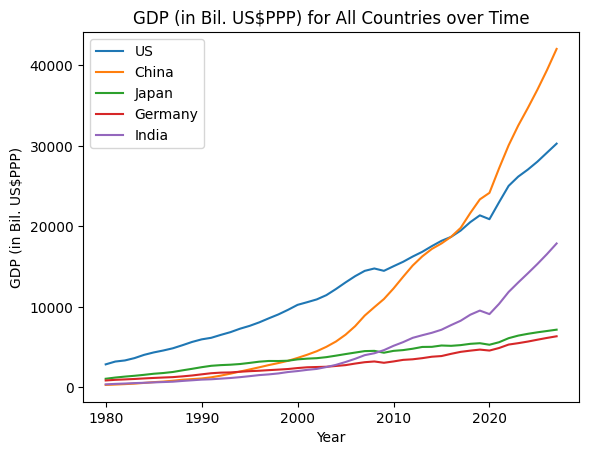

In [19]:
# select the countries of interest
countries = ['US', 'China', 'Japan', 'Germany', 'India']

# create a separate plot for each country
for country in countries:
    # filter the data to include only rows where the 'Country' column is the current country
    country_df = df[df['Country'] == country]

    # calculate the GDP growth rate compared to the previous year
    country_df['GDP Growth Rate'] = country_df['GDP (in Bil. US$PPP)'].pct_change()

    # create a line plot with 'Year' on the x-axis and 'GDP (in Bil. US$PPP)' on the y-axis
    plt.plot(country_df['Year'], country_df['GDP (in Bil. US$PPP)'], label=country)

    # set the title and axis labels
    plt.title('GDP (in Bil. US$PPP) for All Countries over Time')
    plt.xlabel('Year')
    plt.ylabel('GDP (in Bil. US$PPP)')

# add a legend to differentiate between the countries
plt.legend()

# display the plot
plt.show()


/tmp/ipykernel_34/1827178847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate'] = country_df['GDP (in Bil. US$PPP)'].pct_change()


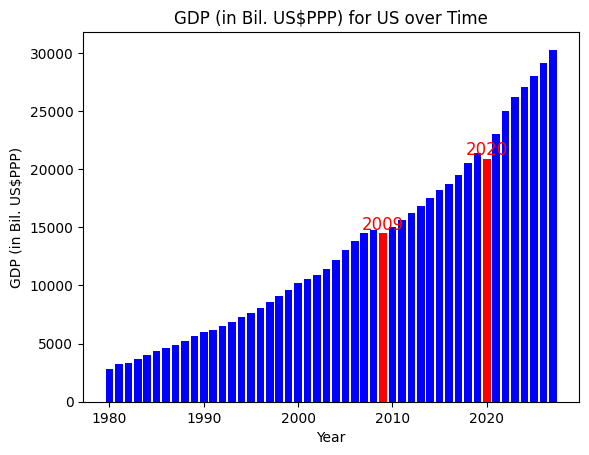

/tmp/ipykernel_34/1827178847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate'] = country_df['GDP (in Bil. US$PPP)'].pct_change()


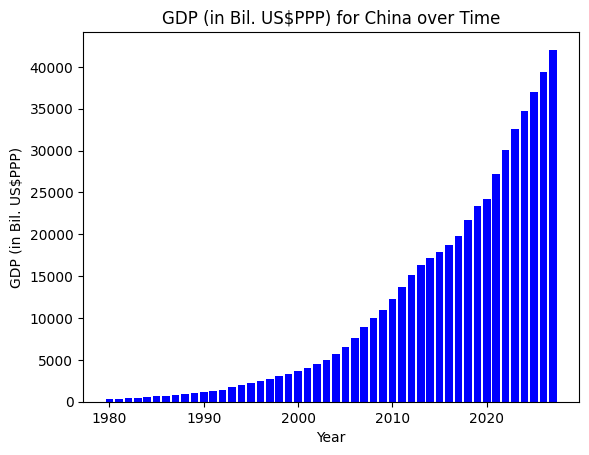

/tmp/ipykernel_34/1827178847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate'] = country_df['GDP (in Bil. US$PPP)'].pct_change()


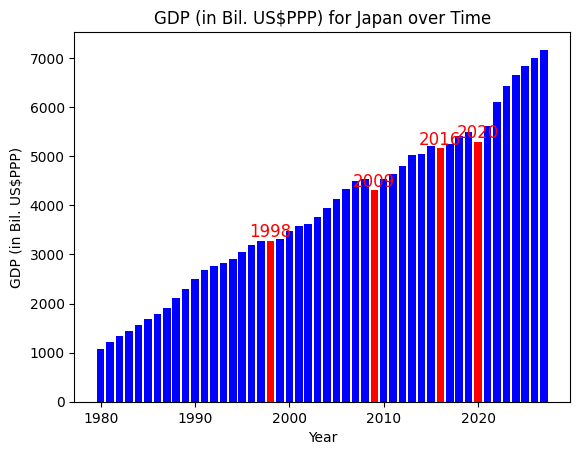

/tmp/ipykernel_34/1827178847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate'] = country_df['GDP (in Bil. US$PPP)'].pct_change()


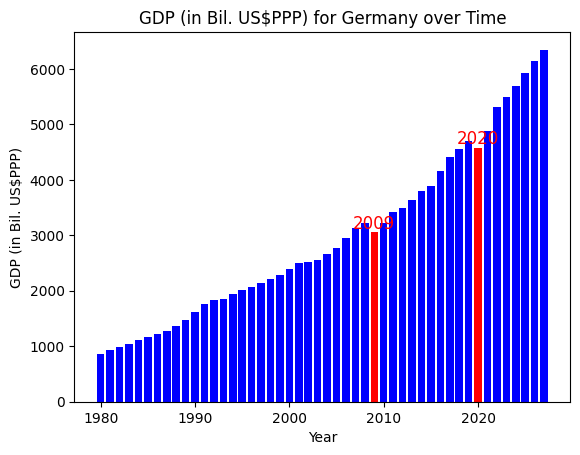

/tmp/ipykernel_34/1827178847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate'] = country_df['GDP (in Bil. US$PPP)'].pct_change()


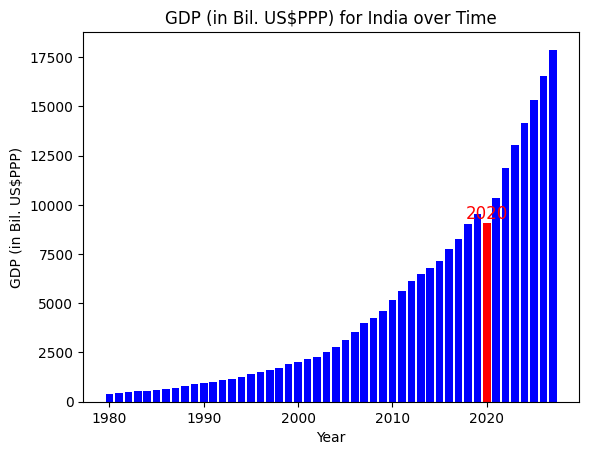

In [20]:
# select the countries of interest
countries = ['US', 'China', 'Japan', 'Germany', 'India']

# create a separate plot for each country
for country in countries:
    # filter the data to include only rows where the 'Country' column is the current country
    country_df = df[df['Country'] == country]

    # calculate the GDP growth rate compared to the previous year
    country_df['GDP Growth Rate'] = country_df['GDP (in Bil. US$PPP)'].pct_change()

    # create a bar plot with 'Year' on the x-axis and 'GDP (in Bil. US$PPP)' on the y-axis
    ax = plt.subplot(111)
    ax.bar(country_df['Year'], country_df['GDP (in Bil. US$PPP)'], color='blue')

    # highlight negative growth rates in red
    ax.bar(country_df['Year'][country_df['GDP Growth Rate'] < 0], 
           country_df['GDP (in Bil. US$PPP)'][country_df['GDP Growth Rate'] < 0], 
           color='red')

    # label years with negative growth in red
    for i, row in country_df.iterrows():
        if row['GDP Growth Rate'] < 0:
            ax.text(row['Year'], row['GDP (in Bil. US$PPP)'], row['Year'], ha='center', va='bottom', color='red', fontsize=12)

    # set the title and axis labels
    plt.title('GDP (in Bil. US$PPP) for {} over Time'.format(country))
    plt.xlabel('Year')
    plt.ylabel('GDP (in Bil. US$PPP)')

    # display the plot
    plt.show()
    

Insights:
- The **US** experienced a decline in **GDP (in Bil. US$PPP) twice over time, in 2009 and 2020**. 

- **China has not experienced a decline** in GDP (in Bil. US$PPP) over time. 

- **Japan** experienced a **decline in GDP (in Bil. US$PPP) four times over time, in 1998, 2009, 2016, and 2020.** 

- **Germany** experienced a decline in GDP (in Bil. US$PPP) twice over time, in **2009 and 2020**. 

- **India** experienced a decline in **GDP (in Bil. US$PPP) once over time, in 2020**.


 # 2. How many times and in which years did each country experience a decline in GDP per capita (in US$ PPP) over the period under consideration?

/tmp/ipykernel_34/1923625287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate per capita'] = country_df['GDP per capita (in US$ PPP)'].pct_change()


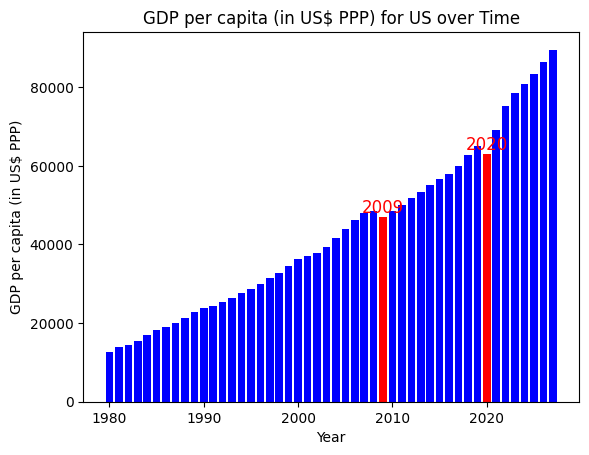

/tmp/ipykernel_34/1923625287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate per capita'] = country_df['GDP per capita (in US$ PPP)'].pct_change()


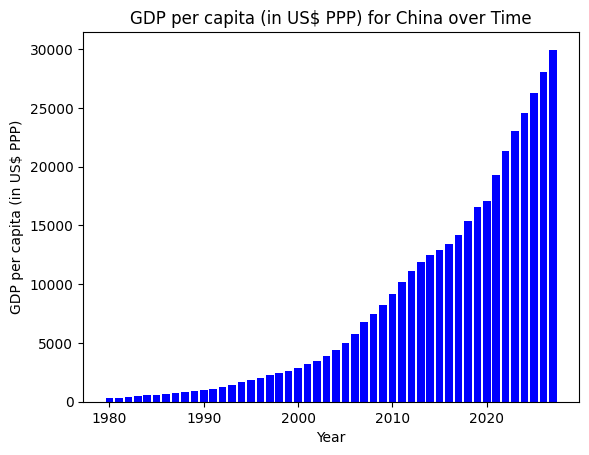

/tmp/ipykernel_34/1923625287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate per capita'] = country_df['GDP per capita (in US$ PPP)'].pct_change()


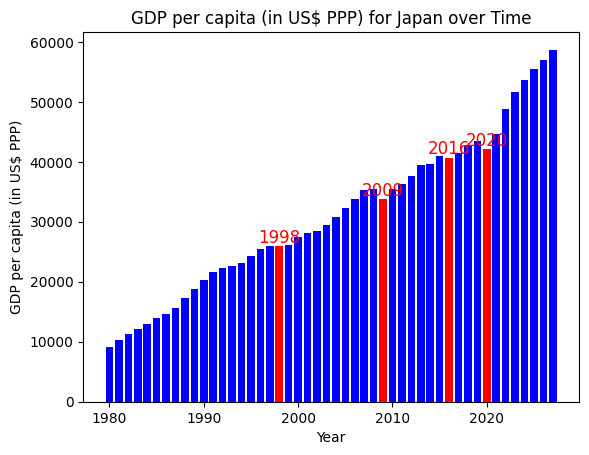

/tmp/ipykernel_34/1923625287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate per capita'] = country_df['GDP per capita (in US$ PPP)'].pct_change()


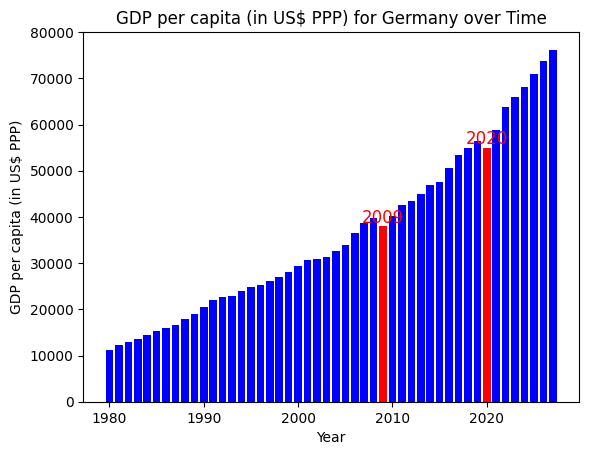

/tmp/ipykernel_34/1923625287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate per capita'] = country_df['GDP per capita (in US$ PPP)'].pct_change()


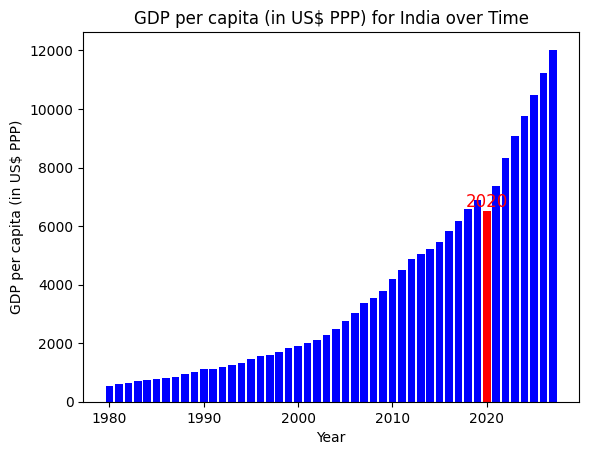

In [21]:
# select the countries of interest
countries = ['US', 'China', 'Japan', 'Germany', 'India']

# create a separate plot for each country
for country in countries:
    # filter the data to include only rows where the 'Country' column is the current country
    country_df = df[df['Country'] == country]

    # calculate the GDP growth rate compared to the previous year
    country_df['GDP Growth Rate per capita'] = country_df['GDP per capita (in US$ PPP)'].pct_change()

    # create a bar plot with 'Year' on the x-axis and 'GDP (in Bil. US$PPP)' on the y-axis
    ax = plt.subplot(111)
    ax.bar(country_df['Year'], country_df['GDP per capita (in US$ PPP)'], color='blue')

    # highlight negative growth rates in red
    ax.bar(country_df['Year'][country_df['GDP Growth Rate per capita'] < 0], 
           country_df['GDP per capita (in US$ PPP)'][country_df['GDP Growth Rate per capita'] < 0], 
           color='red')

    # label years with negative growth in red
    for i, row in country_df.iterrows():
        if row['GDP Growth Rate per capita'] < 0:
            ax.text(row['Year'], row['GDP per capita (in US$ PPP)'], row['Year'], ha='center', va='bottom', color='red', fontsize=12)

    # set the title and axis labels
    plt.title('GDP per capita (in US$ PPP) for {} over Time'.format(country))
    plt.xlabel('Year')
    plt.ylabel('GDP per capita (in US$ PPP)')

    # display the plot
    plt.show()

Insights:

- The US experienced a decline in GDP per capita (in US$ PPP) twice over time, in 2009 and 2020. 

- China has not experienced a decline in GDP per capita (in US$ PPP) over time. 

- Japan experienced a decline in GDP per capita (in US$ PPP) four times over time, in 1998, 2009, 2016, and 2020. 

- Germany experienced a decline in GDP per capita (in US$ PPP) twice over time, in 2009 and 2020. 

- India experienced a decline in GDP per capita (in US$ PPP) once over time, in 2020.


 # 3. How many times and in which years did each country experience a decline in GDP (in Bil. US$nominal) over the period under consideration?

/tmp/ipykernel_34/2504938736.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate in Bil. US$nominal'] = country_df['GDP (in Bil. US$nominal)'].pct_change()


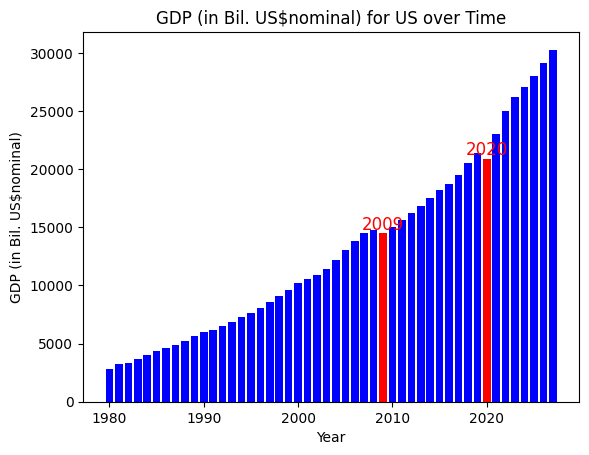

/tmp/ipykernel_34/2504938736.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate in Bil. US$nominal'] = country_df['GDP (in Bil. US$nominal)'].pct_change()


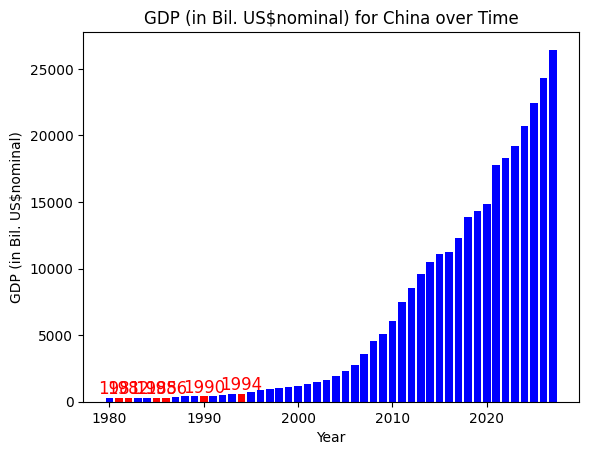

/tmp/ipykernel_34/2504938736.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate in Bil. US$nominal'] = country_df['GDP (in Bil. US$nominal)'].pct_change()


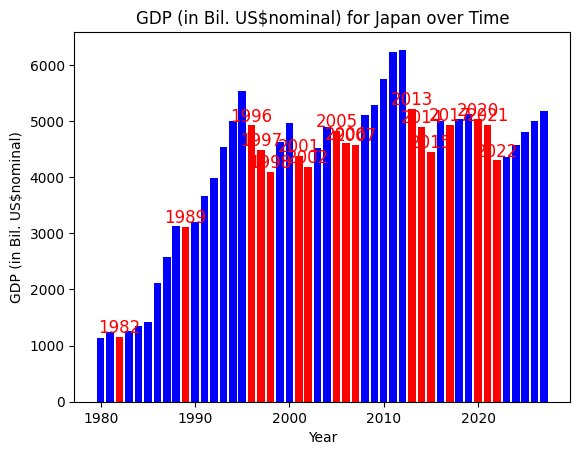

/tmp/ipykernel_34/2504938736.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate in Bil. US$nominal'] = country_df['GDP (in Bil. US$nominal)'].pct_change()


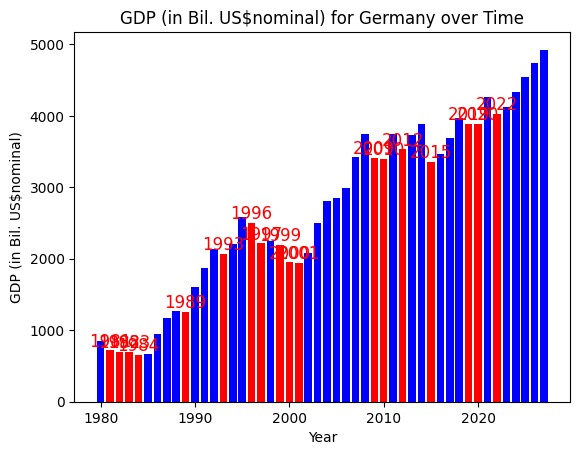

/tmp/ipykernel_34/2504938736.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate in Bil. US$nominal'] = country_df['GDP (in Bil. US$nominal)'].pct_change()


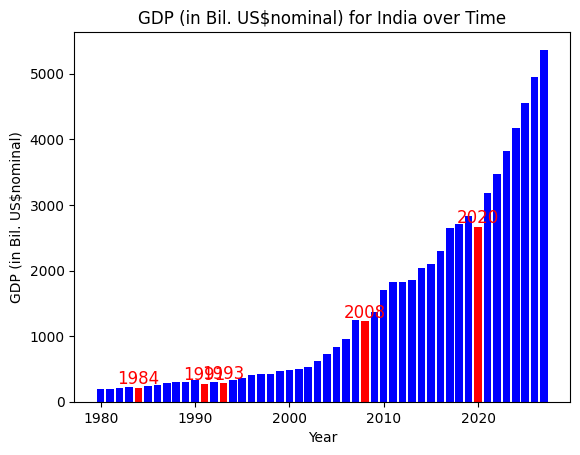

In [23]:
# select the countries of interest
countries = ['US', 'China', 'Japan', 'Germany', 'India']

# create a separate plot for each country
for country in countries:
    # filter the data to include only rows where the 'Country' column is the current country
    country_df = df[df['Country'] == country]

    # calculate the GDP growth rate compared to the previous year
    country_df['GDP Growth Rate in Bil. US$nominal'] = country_df['GDP (in Bil. US$nominal)'].pct_change()

    # create a bar plot with 'Year' on the x-axis and 'GDP (in Bil. US$PPP)' on the y-axis
    ax = plt.subplot(111)
    ax.bar(country_df['Year'], country_df['GDP (in Bil. US$nominal)'], color='blue')

    # highlight negative growth rates in red
    ax.bar(country_df['Year'][country_df['GDP Growth Rate in Bil. US$nominal'] < 0], 
           country_df['GDP (in Bil. US$nominal)'][country_df['GDP Growth Rate in Bil. US$nominal'] < 0], 
           color='red')

    # label years with negative growth in red
    for i, row in country_df.iterrows():
        if row['GDP Growth Rate in Bil. US$nominal'] < 0:
            ax.text(row['Year'], row['GDP (in Bil. US$nominal)'], row['Year'], ha='center', va='bottom', color='red', fontsize=12)

    # set the title and axis labels
    plt.title('GDP (in Bil. US$nominal) for {} over Time'.format(country))
    plt.xlabel('Year')
    plt.ylabel('GDP (in Bil. US$nominal)')

    # display the plot
    plt.show()

Insights:
- The US has experienced two instances of decline in GDP (in Bil. US$nominal) over time, in 2009 and 2020.

- China had a period of decline in GDP (in Bil. US$nominal) from 1980 to 1994.

- Japan has experienced numerous instances of decline in GDP (in Bil. US$nominal) over time, from 1996 to 2007 and from 2013 to 2022.

- Germany has also experienced multiple instances of decline in GDP (in Bil. US$nominal) over time.

- India has experienced five instances of decline in GDP (in Bil. US$nominal), in 1984, 1991, 1993, 2008, and 2020.

# 3. How many times and in which years did each country experience a decline in GDP growth (real) over the period under consideration?

/tmp/ipykernel_34/946221231.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate in GDP growth (real)'] = country_df['GDP growth (real)'].pct_change()


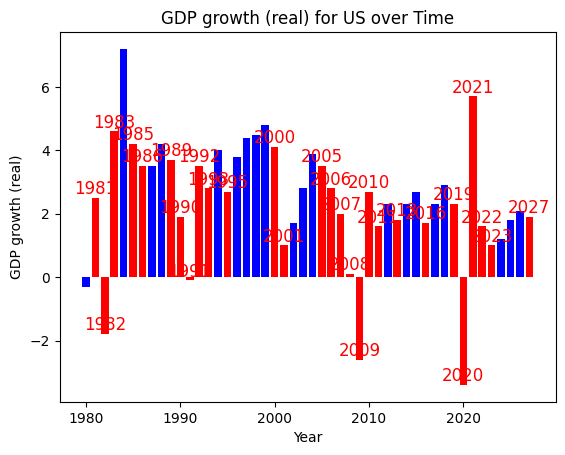

/tmp/ipykernel_34/946221231.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate in GDP growth (real)'] = country_df['GDP growth (real)'].pct_change()


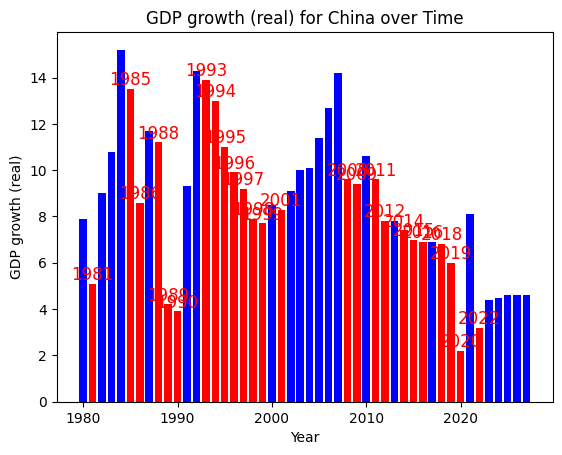

/tmp/ipykernel_34/946221231.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate in GDP growth (real)'] = country_df['GDP growth (real)'].pct_change()


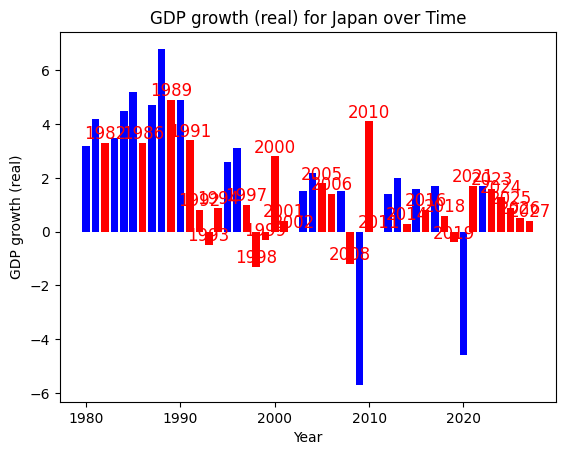

/tmp/ipykernel_34/946221231.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate in GDP growth (real)'] = country_df['GDP growth (real)'].pct_change()


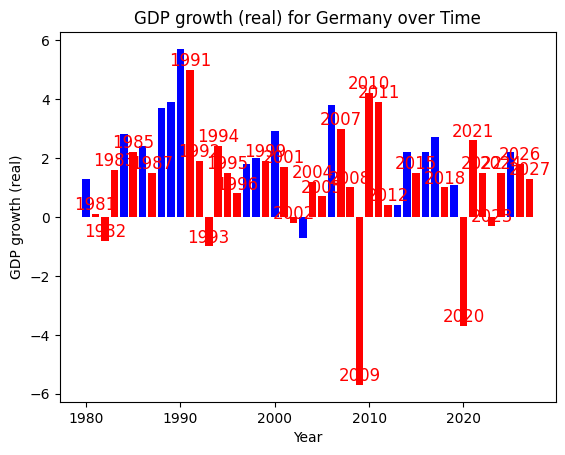

/tmp/ipykernel_34/946221231.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate in GDP growth (real)'] = country_df['GDP growth (real)'].pct_change()


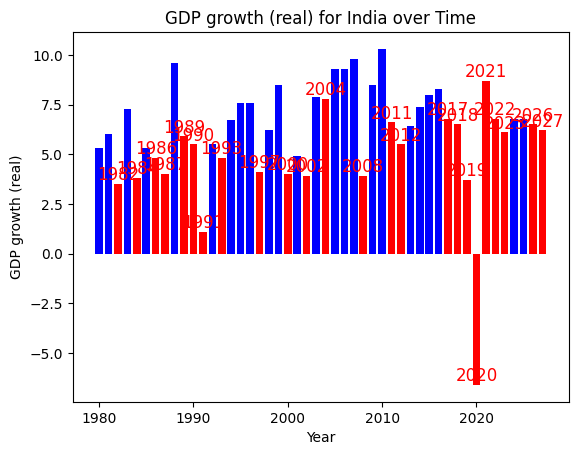

In [24]:
# select the countries of interest
countries = ['US', 'China', 'Japan', 'Germany', 'India']

# create a separate plot for each country
for country in countries:
    # filter the data to include only rows where the 'Country' column is the current country
    country_df = df[df['Country'] == country]

    # calculate the GDP growth rate compared to the previous year
    country_df['GDP Growth Rate in GDP growth (real)'] = country_df['GDP growth (real)'].pct_change()

    # create a bar plot with 'Year' on the x-axis and 'GDP (in Bil. US$PPP)' on the y-axis
    ax = plt.subplot(111)
    ax.bar(country_df['Year'], country_df['GDP growth (real)'], color='blue')

    # highlight negative growth rates in red
    ax.bar(country_df['Year'][country_df['GDP Growth Rate in GDP growth (real)'] < 0], 
           country_df['GDP growth (real)'][country_df['GDP Growth Rate in GDP growth (real)'] < 0], 
           color='red')

    # label years with negative growth in red
    for i, row in country_df.iterrows():
        if row['GDP Growth Rate in GDP growth (real)'] < 0:
            ax.text(row['Year'], row['GDP growth (real)'], row['Year'], ha='center', va='bottom', color='red', fontsize=12)

    # set the title and axis labels
    plt.title('GDP growth (real) for {} over Time'.format(country))
    plt.xlabel('Year')
    plt.ylabel('GDP growth (real)')

    # display the plot
    plt.show()

/tmp/ipykernel_34/2739165243.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate'] = country_df['GDP growth (real)'].pct_change()
/tmp/ipykernel_34/2739165243.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Growth Rate'] = country_df['GDP growth (real)'].pct_change()
/tmp/ipykernel_34/2739165243.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

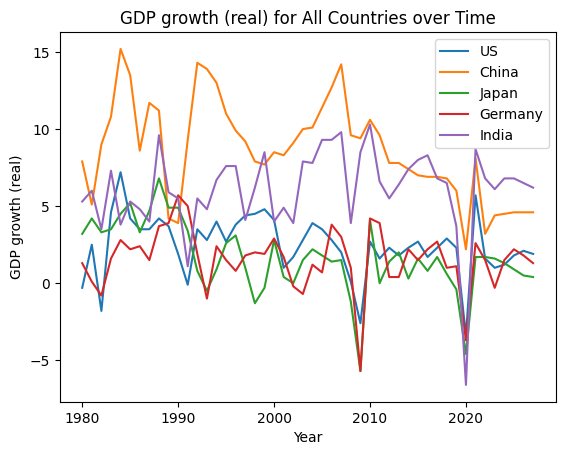

In [25]:
# select the countries of interest
countries = ['US', 'China', 'Japan', 'Germany', 'India']

# create a separate plot for each country
for country in countries:
    # filter the data to include only rows where the 'Country' column is the current country
    country_df = df[df['Country'] == country]

    # calculate the GDP growth rate compared to the previous year
    country_df['GDP Growth Rate'] = country_df['GDP growth (real)'].pct_change()

    # create a line plot with 'Year' on the x-axis and 'GDP (in Bil. US$PPP)' on the y-axis
    plt.plot(country_df['Year'], country_df['GDP growth (real)'], label=country)

    # set the title and axis labels
    plt.title('GDP growth (real) for All Countries over Time')
    plt.xlabel('Year')
    plt.ylabel('GDP growth (real)')

# add a legend to differentiate between the countries
plt.legend()

# display the plot
plt.show()


### Insights-
All of the countries have experienced declines in GDP growth rate in the past, resulting in negative growth rates ranging from -1% to -6%. However, China has never experienced a negative growth rate in terms of GDP growth rate.

# 4. How many times and in which years did each country experience a decline in Inflation rate (in Percent) over the period under consideration?

/tmp/ipykernel_34/1096730592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Inflation rate (in Percent)'] = country_df['Inflation rate (in Percent)'].pct_change()


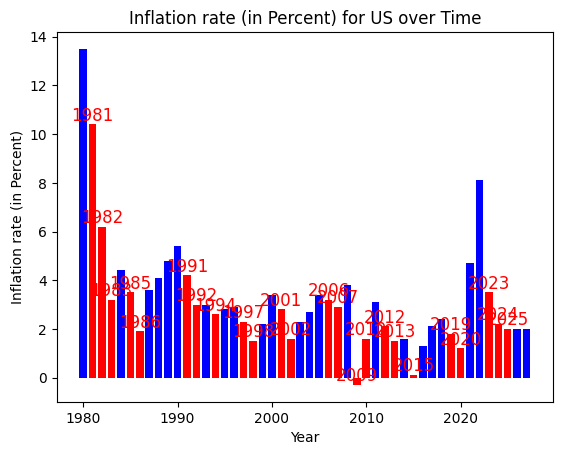

/tmp/ipykernel_34/1096730592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Inflation rate (in Percent)'] = country_df['Inflation rate (in Percent)'].pct_change()


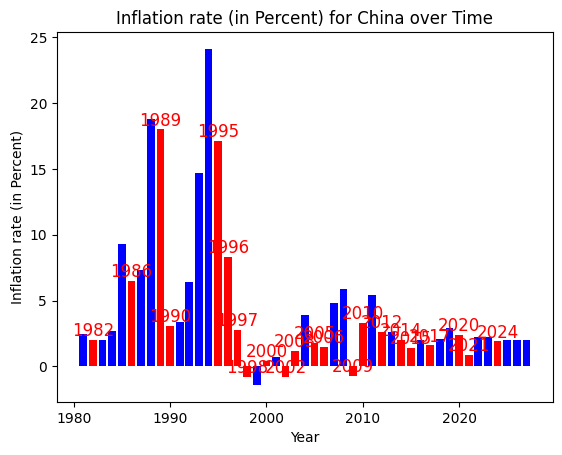

/tmp/ipykernel_34/1096730592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Inflation rate (in Percent)'] = country_df['Inflation rate (in Percent)'].pct_change()


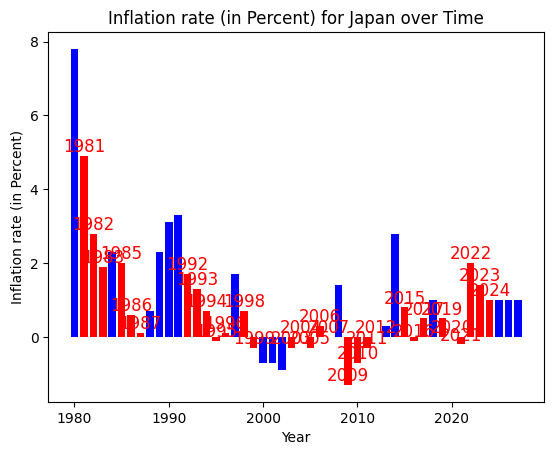

/tmp/ipykernel_34/1096730592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Inflation rate (in Percent)'] = country_df['Inflation rate (in Percent)'].pct_change()


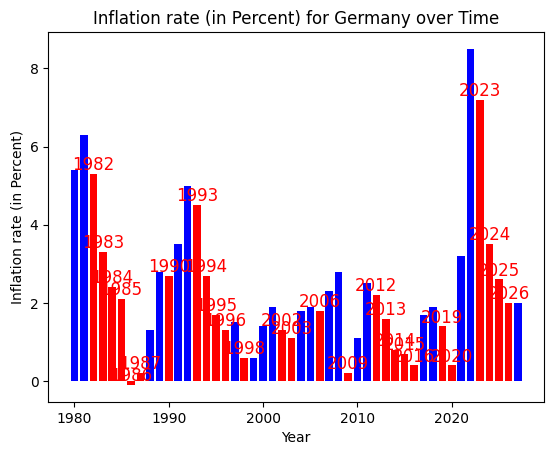

/tmp/ipykernel_34/1096730592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDP Inflation rate (in Percent)'] = country_df['Inflation rate (in Percent)'].pct_change()


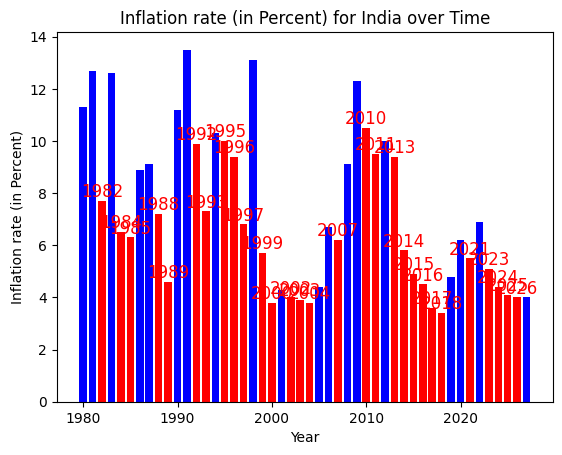

In [26]:
# select the countries of interest
countries = ['US', 'China', 'Japan', 'Germany', 'India']

# create a separate plot for each country
for country in countries:
    # filter the data to include only rows where the 'Country' column is the current country
    country_df = df[df['Country'] == country]

    # calculate the GDP growth rate compared to the previous year
    country_df['GDP Inflation rate (in Percent)'] = country_df['Inflation rate (in Percent)'].pct_change()

    # create a bar plot with 'Year' on the x-axis and 'GDP (in Bil. US$PPP)' on the y-axis
    ax = plt.subplot(111)
    ax.bar(country_df['Year'], country_df['Inflation rate (in Percent)'], color='blue')

    # highlight negative growth rates in red
    ax.bar(country_df['Year'][country_df['GDP Inflation rate (in Percent)'] < 0], 
           country_df['Inflation rate (in Percent)'][country_df['GDP Inflation rate (in Percent)'] < 0], 
           color='red')

    # label years with negative growth in red
    for i, row in country_df.iterrows():
        if row['GDP Inflation rate (in Percent)'] < 0:
            ax.text(row['Year'], row['Inflation rate (in Percent)'], row['Year'], ha='center', va='bottom', color='red', fontsize=12)

    # set the title and axis labels
    plt.title('Inflation rate (in Percent) for {} over Time'.format(country))
    plt.xlabel('Year')
    plt.ylabel('Inflation rate (in Percent)')

    # display the plot
    plt.show()

/tmp/ipykernel_34/2428985013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Inflation rate (in Percent)'] = country_df['Inflation rate (in Percent)'].pct_change()


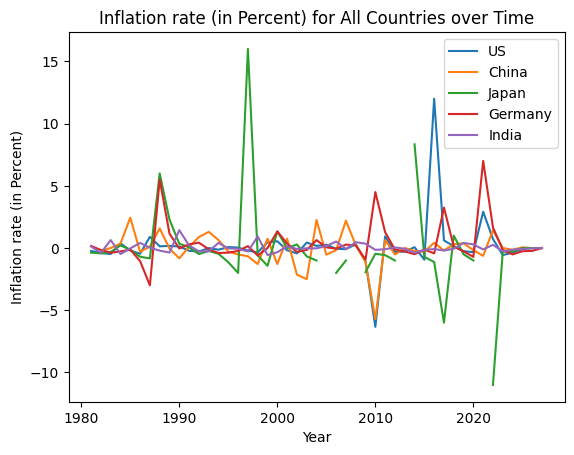

In [27]:
# select the countries of interest
countries = ['US', 'China', 'Japan', 'Germany', 'India']

# create a separate plot for each country
for country in countries:
    # filter the data to include only rows where the 'Country' column is the current country
    country_df = df[df['Country'] == country]

    # calculate the GDP growth rate compared to the previous year
    country_df['Inflation rate (in Percent)'] = country_df['Inflation rate (in Percent)'].pct_change()

    # create a line plot with 'Year' on the x-axis and 'GDP (in Bil. US$PPP)' on the y-axis
    plt.plot(country_df['Year'], country_df['Inflation rate (in Percent)'], label=country)

    # set the title and axis labels
    plt.title('Inflation rate (in Percent) for All Countries over Time')
    plt.xlabel('Year')
    plt.ylabel('Inflation rate (in Percent)')

# add a legend to differentiate between the countries
plt.legend()

# display the plot
plt.show()

### Insight:

In the past, all of the countries included in the analysis have witnessed reductions in their inflation rates (in percent), which led to negative growth rates spanning from -1% to -10%. Nonetheless, India has not observed a negative growth rate in terms of inflation rate (in percent) so far.

# 5. How many times and in which years did each country experience a decline in Unemployment (in Percent) over the period under consideration?

In [30]:
df.columns

Index(['Year', 'GDP (in Bil. US$PPP)', 'GDP per capita (in US$ PPP)',
       'GDP (in Bil. US$nominal)', 'GDP per capita (in US$ nominal)',
       'GDP growth (real)', 'Inflation rate (in Percent)',
       'Unemployment (in Percent)', 'Country',
       'Government debt (in % of GDP)'],
      dtype='object')

/tmp/ipykernel_34/3934823231.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Unemployment (in Percent)'] = country_df['Unemployment (in Percent)'].pct_change()


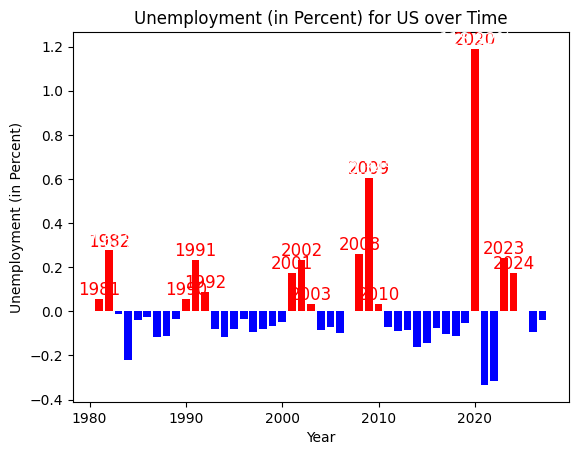

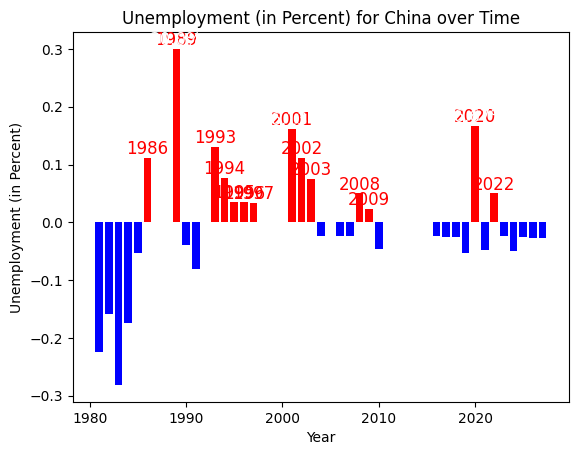

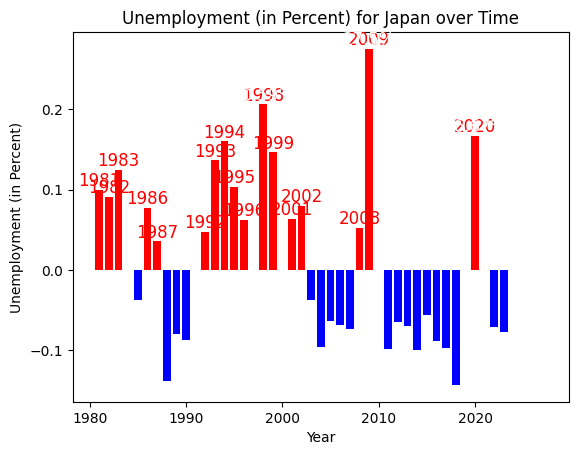

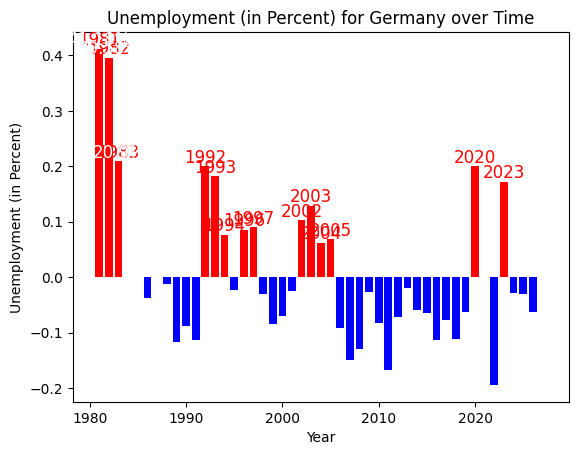

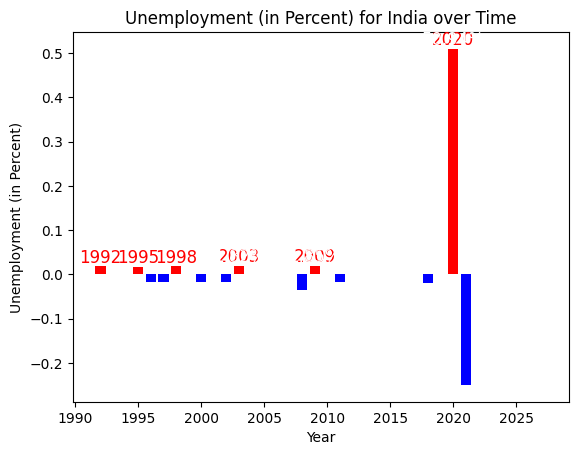

In [48]:
# select the countries of interest
countries = ['US', 'China', 'Japan', 'Germany', 'India']

# create a separate plot for each country
for country in countries:
    # filter the data to include only rows where the 'Country' column is the current country
    country_df = df[df['Country'] == country]

    # calculate the unemployment rate change compared to the previous year
    country_df['Unemployment (in Percent)'] = country_df['Unemployment (in Percent)'].pct_change()

    # sort the dataframe by the 'Unemployment (in Percent)' column in descending order
    sorted_df = country_df.sort_values(by='Unemployment (in Percent)', ascending=False)

    # select the top three rows with the highest unemployment rates
    top_three = sorted_df.head(3)

    # create a bar plot with 'Year' on the x-axis and 'Unemployment (in Percent)' on the y-axis
    ax = plt.subplot(111)
    ax.bar(country_df['Year'], country_df['Unemployment (in Percent)'], color='red')

    # highlight negative growth rates in red
    ax.bar(country_df['Year'][country_df['Unemployment (in Percent)'] < 0], 
           country_df['Unemployment (in Percent)'][country_df['Unemployment (in Percent)'] < 0], 
           color='blue')

    # label years with negative growth in red
    for i, row in country_df.iterrows():
        if row['Unemployment (in Percent)'] > 0:
            ax.text(row['Year'], row['Unemployment (in Percent)'], row['Year'], ha='center', va='bottom', color='red', fontsize=12)

    # add percentage values for the top three years with the highest unemployment rates
    for i, row in top_three.iterrows():
        ax.text(row['Year'], row['Unemployment (in Percent)'], '{}%'.format(round(row['Unemployment (in Percent)']*100, 2)), ha='center', va='bottom', color='white', fontsize=12)

    # set the title and axis labels
    plt.title('Unemployment (in Percent) for {} over Time'.format(country))
    plt.xlabel('Year')
    plt.ylabel('Unemployment (in Percent)')

    # display the plot
    plt.show()


### Insights:
- The highest unemployment rate in the US was in 2009, and it peaked again in 2020.
- China's highest unemployment rate was in 1989, and it peaked again in 2020.
- Japan's highest unemployment rate was in 2009, and it peaked earlier in 1993 as well.
- Germany's highest unemployment rate was in 1981, and it peaked again in 1982.
- India's highest unemployment rate was in 2020.


# 6. How many times and in which years did each country experience a decline in Government debt (in % of GDP) over the period under consideration?

/tmp/ipykernel_34/97074395.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Government debt (in % of GDP)'] = country_df['Government debt (in % of GDP)'].pct_change()


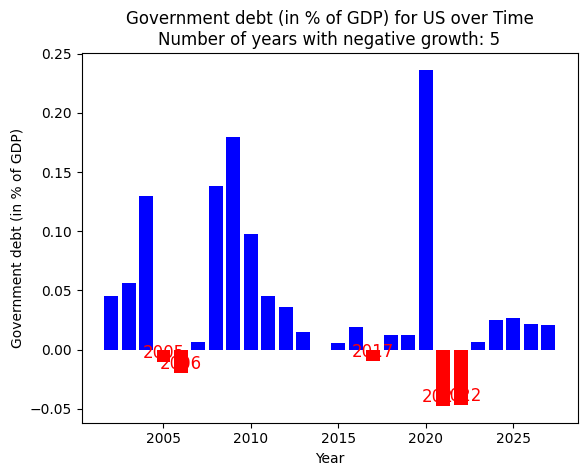

/tmp/ipykernel_34/97074395.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Government debt (in % of GDP)'] = country_df['Government debt (in % of GDP)'].pct_change()


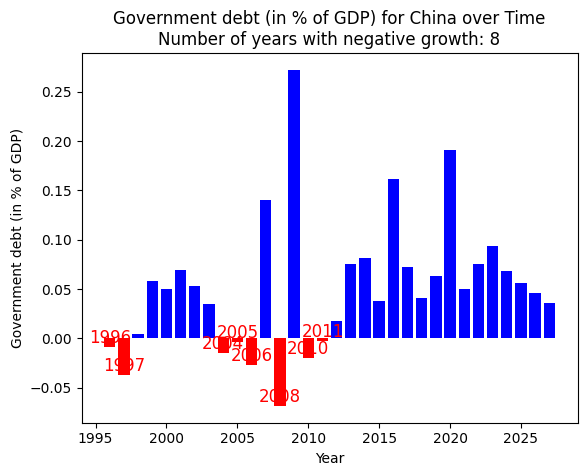

/tmp/ipykernel_34/97074395.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Government debt (in % of GDP)'] = country_df['Government debt (in % of GDP)'].pct_change()


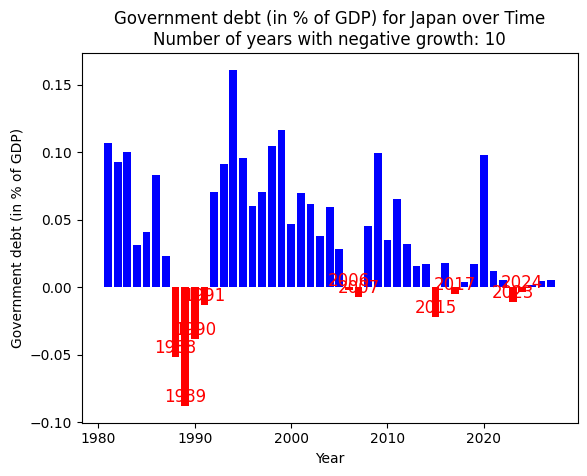

/tmp/ipykernel_34/97074395.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Government debt (in % of GDP)'] = country_df['Government debt (in % of GDP)'].pct_change()


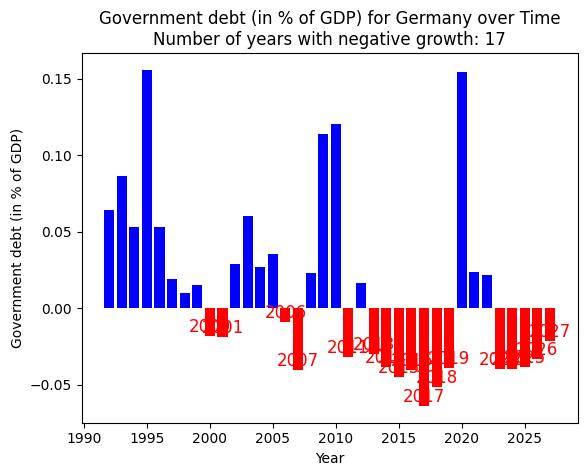

/tmp/ipykernel_34/97074395.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Government debt (in % of GDP)'] = country_df['Government debt (in % of GDP)'].pct_change()


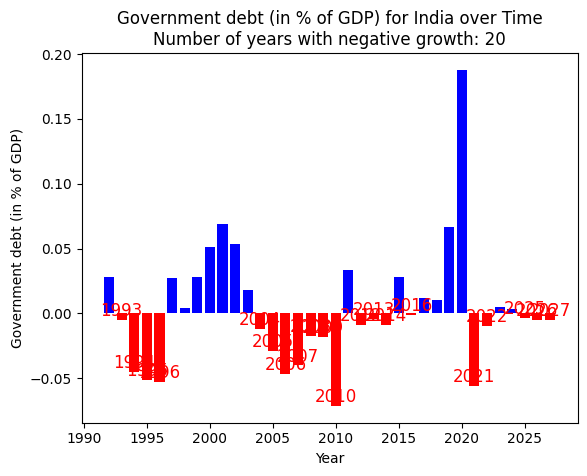

In [50]:
# select the countries of interest
countries = ['US', 'China', 'Japan', 'Germany', 'India']

# create a separate plot for each country
for country in countries:
    # filter the data to include only rows where the 'Country' column is the current country
    country_df = df[df['Country'] == country]

    # calculate the GDP growth rate compared to the previous year
    country_df['Government debt (in % of GDP)'] = country_df['Government debt (in % of GDP)'].pct_change()

    # create a boolean Series for rows where the 'Government debt (in % of GDP)' column is negative
    neg_growth = country_df['Government debt (in % of GDP)'] < 0

    # get the count of years with negative growth
    num_neg_growth_years = (neg_growth.groupby(country_df['Year']).sum() > 0).sum()

    # create a bar plot with 'Year' on the x-axis and 'GDP (in Bil. US$PPP)' on the y-axis
    ax = plt.subplot(111)
    ax.bar(country_df['Year'], country_df['Government debt (in % of GDP)'], color='blue')

    # highlight negative growth rates in red
    ax.bar(country_df['Year'][neg_growth], 
           country_df['Government debt (in % of GDP)'][neg_growth], 
           color='red')

    # label years with negative growth in red
    for i, row in country_df[neg_growth].iterrows():
        ax.text(row['Year'], row['Government debt (in % of GDP)'], row['Year'], ha='center', va='bottom', color='red', fontsize=12)

    # set the title and axis labels, include count of negative growth years in the title
    plt.title('Government debt (in % of GDP) for {} over Time\nNumber of years with negative growth: {}'.format(country, num_neg_growth_years))
    plt.xlabel('Year')
    plt.ylabel('Government debt (in % of GDP)')

    # display the plot
    plt.show()


# Insights:
The analysis of the Government debt (in % of GDP) for different countries over time reveals interesting trends. The number of years with negative growth percentage for this indicator varies significantly across countries.

- The country with the least number of years with negative growth percentage for Government debt (in % of GDP) was the US, which had only 5 such years. In contrast, China had 8 years with negative growth percentage for this indicator.

- On the other hand, the country with the highest number of years with negative growth percentage for Government debt (in % of GDP) was India, which had 20 such years. Germany came second with 17 years of negative growth percentage for this indicator.

# Conclusion

- The US, China, Japan, Germany, and India have all experienced declines in their GDP and GDP per capita over time, with varying frequencies and magnitudes.

- **All of the countries except China have experienced negative growth rates** in terms of GDP growth rate in the past.

- All of the countries have witnessed reductions in their inflation rates, which led to negative growth rates.

- The highest unemployment rates for each country varied in different years, with the US, China, Japan, Germany, and India all experiencing their peaks at different times.

- The number of years with **negative growth percentage for Government debt (in % of GDP)** varied significantly across countries. The **US had the least**, while **India had the most**, with Germany coming second.

- **China** had a period of **decline in GDP (in Bil. US$nominal) from 1980 to 1994**.

- Japan and Germany have experienced multiple instances of decline in GDP (in Bil. US$nominal) over time.

- **India has experienced five instances** of **decline in GDP (in Bil. US$nominal)**, in 1984, 1991, 1993, 2008, and 2020.


![](https://media.tenor.com/6eKgeI8YZc4AAAAd/thank-you.gif)

#### ***********************************Thnak you for watching*********************************

In [ ]:
- 